In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Apapun itu/pizza.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp155,000",14.0,smoked beef,NaN,reguler,yes,no


In [ ]:
df.shape

(136, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       136 non-null    object 
 1   price_rupiah  136 non-null    object 
 2   diameter      136 non-null    float64
 3   topping       135 non-null    object 
 4   variant       135 non-null    object 
 5   size          135 non-null    object 
 6   extra_sauce   131 non-null    object 
 7   extra_cheese  136 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.6+ KB


In [ ]:
#check any missing value in dataset
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         1
variant         1
size            1
extra_sauce     5
extra_cheese    0
dtype: int64

In [ ]:
# drop missing value di kolom 'topping, variant, size'
df = df.dropna(subset=['topping','variant','size'], inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    object 
 1   price_rupiah  134 non-null    object 
 2   diameter      134 non-null    float64
 3   topping       134 non-null    object 
 4   variant       134 non-null    object 
 5   size          134 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  134 non-null    object 
dtypes: float64(1), object(7)
memory usage: 9.4+ KB
None


In [ ]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     5
extra_cheese    0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
19,A,"Rp70,000",8.0,chicken,meat_lovers,reguler,NaN,yes
43,B,"Rp76,000",12.0,chicken,crunchy,medium,NaN,no
62,C,"Rp99,000",14.0,sausage,BBQ_sausage,large,NaN,yes
95,D,"Rp23,500",8.5,mozzarella,classic,small,NaN,no
135,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,NaN,no


In [ ]:
df.groupby('extra_sauce').count()

,company,price_rupiah,diameter,topping,variant,size,extra_cheese
extra_sauce,,,,,,,
no,53,53,53,53,53,53,53
yes,76,76,76,76,76,76,76


In [ ]:
#mengisi nilai yang hilang pada kolom'Extra_sauce' dengan 'yes' (karena muncul lebih sering dibandingkan 'no')
df['extra_sauce'] = df['extra_sauce'].fillna("yes")
#mengecek kembali dataframe ada yang kosong apa tidak
df[df.isna().any(axis=1)]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese


In [ ]:
df['price_rupiah'].sample(5)

78      Rp35,000
2      Rp120,000
65      Rp98,000
11     Rp140,000
113     Rp69,000
Name: price_rupiah, dtype: object

In [ ]:
#remove string & special character in price column & convert into 'int64'
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','').str.replace(',','')
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])

In [ ]:
# re-check the data type of price column is numeric
df['price_rupiah'].dtype

dtype('int64')

In [ ]:
df['topping'].unique()
#total 12 toppings

array(['chicken', 'papperoni', 'mushrooms', 'smoked beef', 'mozzarella',
       'black papper', 'tuna', 'meat', 'sausage', 'onion', 'vegetables',
       'beef'], dtype=object)

In [ ]:
df['variant'].unique()
#total 21 variants

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

statistics deskription

In [ ]:
df.describe()

,price_rupiah,diameter
count,134.000000,134.000000
mean,86485.074627,12.899254
std,44253.199209,3.265092
min,23500.000000,8.000000
25%,51750.000000,12.000000
50%,78000.000000,12.000000
75%,103500.000000,14.000000
max,248000.000000,22.000000


histogram for price

<Axes: >

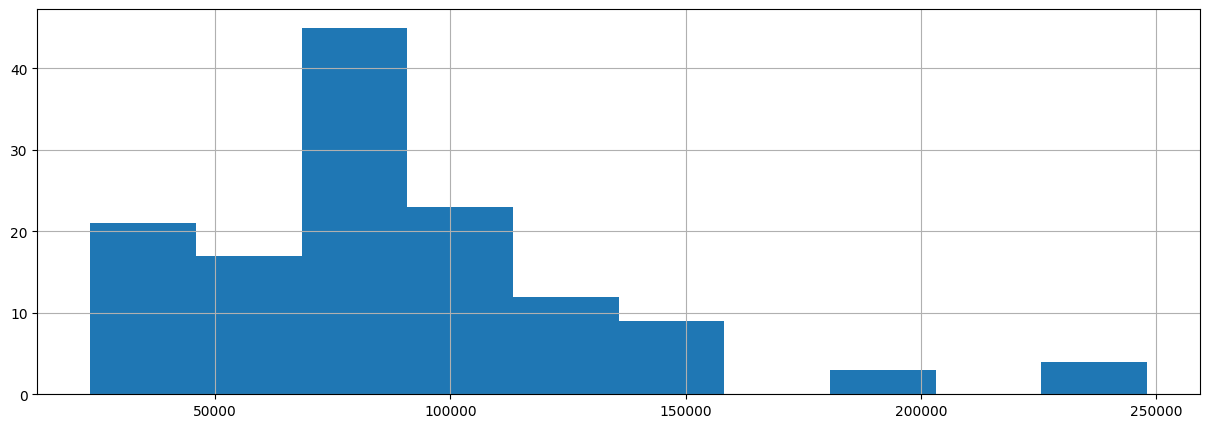

In [ ]:
plt.figure(figsize=(15,5))
df["price_rupiah"].hist()

bar chart for diameter (counts)

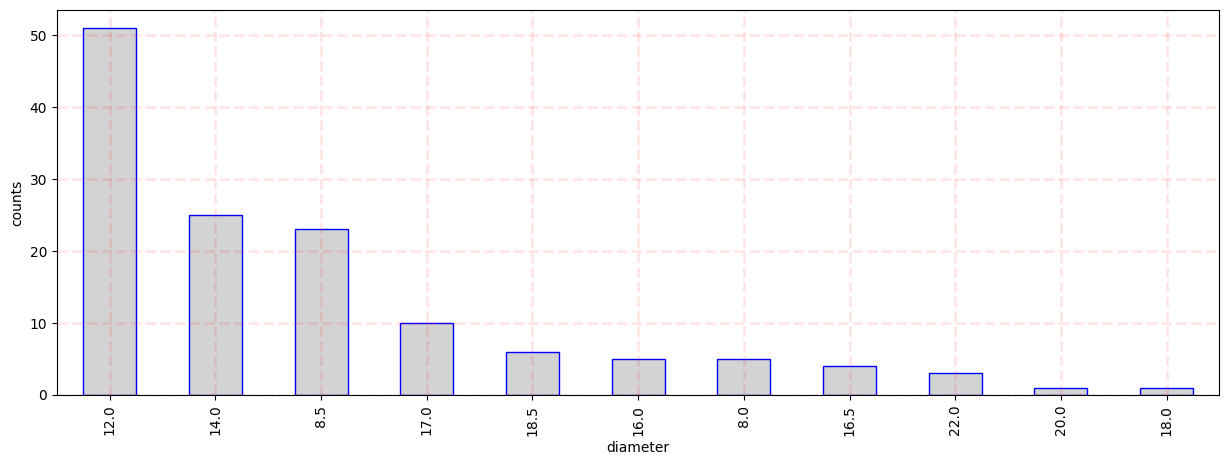

In [ ]:
plt.figure(figsize=(15,5))
df['diameter'].value_counts().plot.bar(color = 'lightgrey', edgecolor= 'blue')
plt.xlabel('diameter')
plt.ylabel('counts')
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)
plt.show()

scatter plot for diamater by price

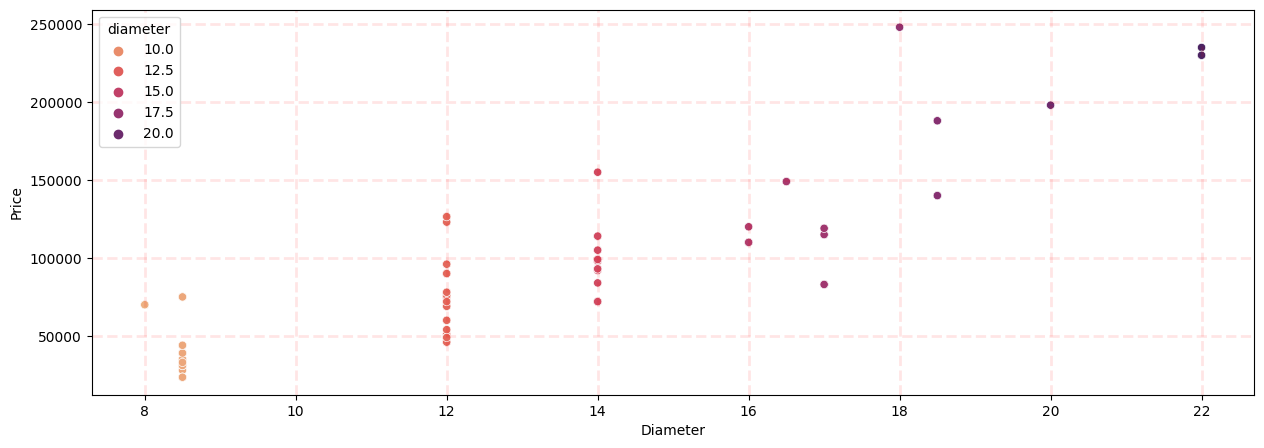

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['diameter'], y = df['price_rupiah'], hue = df['diameter'], palette = "flare")
plt.xlabel('Diameter')
plt.ylabel('Price')
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)
plt.show()

scatterplot untuk company berdasarkan harga

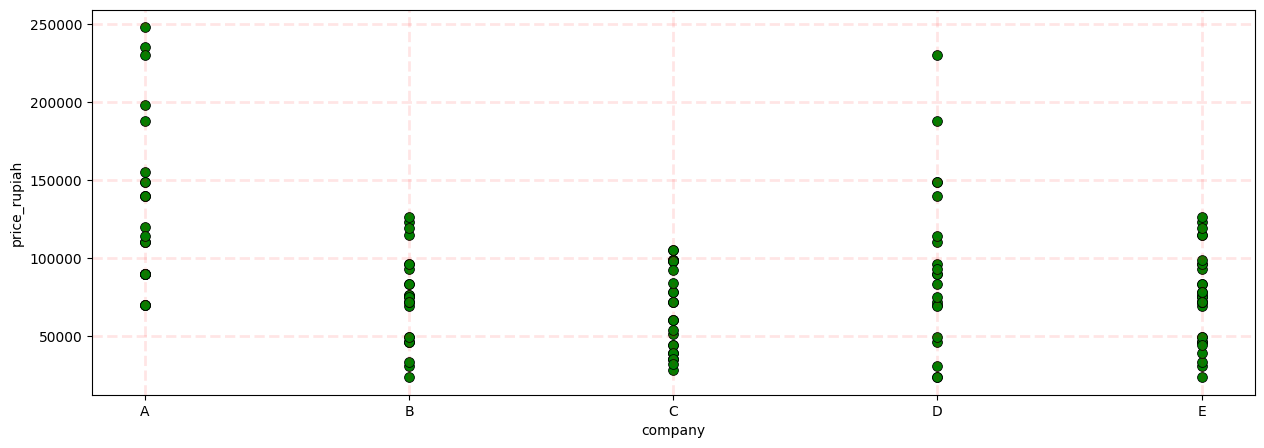

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['company'], y = df['price_rupiah'], s = 50, color = 'green', edgecolor = 'k')
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)

scatter plot untuk topping berdasarkan harga

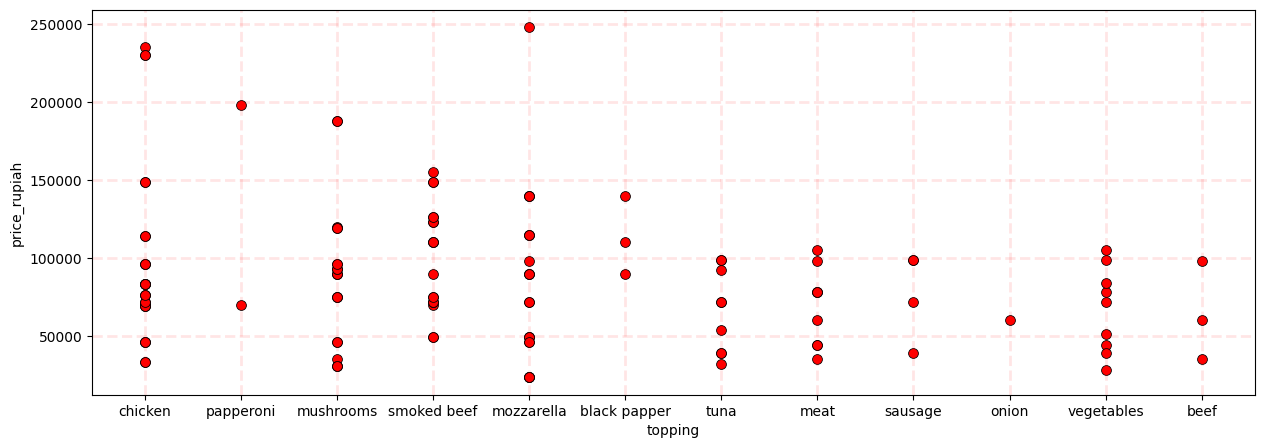

In [ ]:
from ipywidgets.widgets.widget_int import Color
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['topping'], y = df['price_rupiah'], s = 50, color = 'red', edgecolor = 'k')
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)

rename colom

In [ ]:
df.rename(columns={"price_rupiah": "price"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    object 
 1   price         134 non-null    int64  
 2   diameter      134 non-null    float64
 3   topping       134 non-null    object 
 4   variant       134 non-null    object 
 5   size          134 non-null    object 
 6   extra_sauce   134 non-null    object 
 7   extra_cheese  134 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.4+ KB


menghitung harga rata2 masing diameter

In [ ]:
mean_price = df["price"].groupby(df["diameter"]).mean()
print(mean_price)

diameter
8.0      70000.000000
8.5      37217.391304
12.0     74725.490196
14.0     93640.000000
16.0    112000.000000
16.5    149000.000000
17.0     99800.000000
18.0    248000.000000
18.5    156000.000000
20.0    198000.000000
22.0    231666.666667
Name: price, dtype: float64


mengubah karakter menjadi numerik

In [ ]:
EN = LabelEncoder()
df['company']= EN.fit_transform(df['company'])
df['topping']= EN.fit_transform(df['topping'])
df['variant']= EN.fit_transform(df['variant'])
df['size']= EN.fit_transform(df['size'])
df['extra_sauce']= EN.fit_transform(df['extra_sauce'])
df['extra_cheese']= EN.fit_transform(df['extra_cheese'])

df.sample(20)


,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
49,1,49000,12.0,9,5,3,0,1
131,4,72000,12.0,10,16,3,1,1
126,4,72000,14.0,4,4,2,1,1
66,2,35000,8.5,3,12,5,1,1
5,0,248000,18.0,4,8,1,1,0
10,0,90000,12.0,9,3,4,0,0
65,2,98000,14.0,4,9,2,1,1
0,0,235000,22.0,2,8,1,1,1
52,1,96000,12.0,5,6,3,0,1
17,0,110000,16.0,9,13,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       134 non-null    int64  
 1   price         134 non-null    int64  
 2   diameter      134 non-null    float64
 3   topping       134 non-null    int64  
 4   variant       134 non-null    int64  
 5   size          134 non-null    int64  
 6   extra_sauce   134 non-null    int64  
 7   extra_cheese  134 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 9.4 KB


korelasi dari setiap kolom

<ipython-input-34-934b065c8c2c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

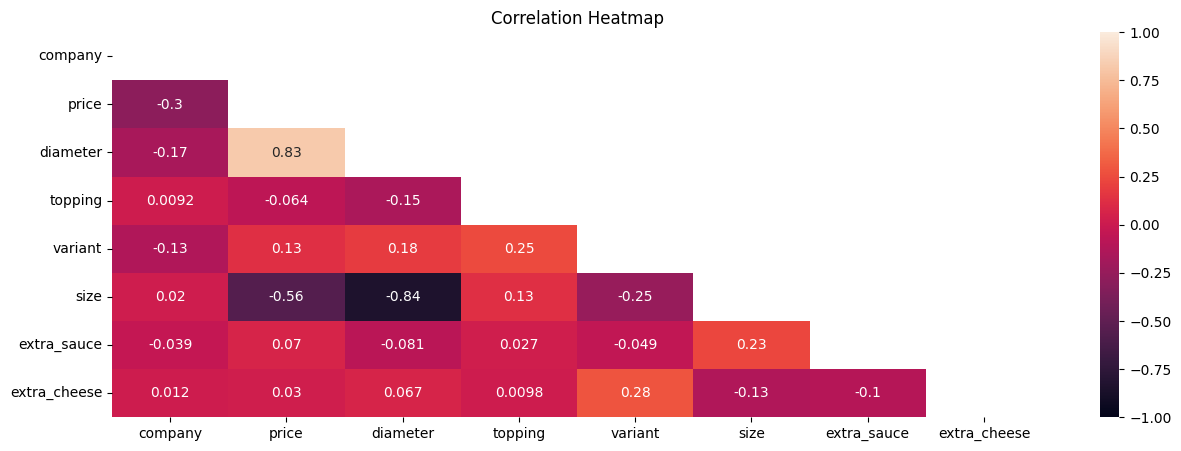

In [ ]:
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True, mask = mask)
#menentukan format plot(judul)
heatmap.set_title('Correlation Heatmap')

Split data

In [ ]:
x = df.drop(columns=['price'])
y = df['price']

Membuat model

In [ ]:
reg = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('Shape of x train :', x_train.shape)
print('Shape of y train :', y_train.shape)

print('Shape of x test :', x_test.shape)
print('Shape of y test :', y_test.shape)

Shape of x train : (107, 7)
Shape of y train : (107,)
Shape of x test : (27, 7)
Shape of y test : (27,)


In [ ]:
#training data
reg = reg.fit(x_train, y_train)
print(reg)

LinearRegression()


coba test data

In [ ]:
y_pred = reg.predict(x_test)
print(y_pred)

[ 93630.2089721  106764.36283761 169413.48539438 124784.46042134
 143505.0449204  104686.65425417  75664.47510662  35008.72748845
 100500.64573291  40982.92335569  67939.585813    81710.24970421
  44573.32055313  74067.81590917  48257.26671657  75895.65134852
 102655.24498642  72751.01089255  93789.2969189   82520.29107287
  72125.50643312  36486.6451015  101845.20361776  41993.63751301
  62007.76173071  40868.97284039  97173.96683687]


In [ ]:
#ubah 2 angka belakang koma
y_pred = np.round_(y_pred, decimals = 2)
print('Rounded values : ', y_pred)

Rounded values :  [ 93630.21 106764.36 169413.49 124784.46 143505.04 104686.65  75664.48
  35008.73 100500.65  40982.92  67939.59  81710.25  44573.32  74067.82
  48257.27  75895.65 102655.24  72751.01  93789.3   82520.29  72125.51
  36486.65 101845.2   41993.64  62007.76  40868.97  97173.97]


linear regresion formula

In [ ]:
print(reg.intercept_)

-143088.92958820687


In [ ]:
print(reg.coef_)

[-4020.01805948 15515.15224845   971.15473802  -315.14682535
 10895.35058336  6386.63568492   940.65128478]


In [ ]:
#menampilkan hasil linear regression
coeff_df = pd.DataFrame(reg.coef_, x.columns, columns = ["Coeffiecient"])
coeff_df

,Coeffiecient
company,-4020.018059
diameter,15515.152248
topping,971.154738
variant,-315.146825
size,10895.350583
extra_sauce,6386.635685
extra_cheese,940.651285


In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED PRICE'] = y_pred
df_test_set.sample(10)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price,PREDICTED PRICE
27,1,8.5,4,4,5,1,0,23500,48257.27
84,3,18.5,4,13,1,0,1,140000,143505.04
133,4,8.5,3,0,5,1,0,44000,36486.65
40,1,12.0,4,4,3,1,1,46000,81710.25
25,0,16.5,9,7,4,1,0,149000,169413.49
32,1,12.0,2,6,3,0,1,96000,72751.01
80,2,14.0,0,2,2,1,0,98000,93630.21
60,2,12.0,8,1,3,1,1,72000,82520.29
62,2,14.0,8,1,2,1,1,99000,102655.24
30,1,12.0,4,5,3,0,0,49000,74067.82


Scatterplot Actual price vc predic price

Text(0, 0.5, 'Predicted Price')

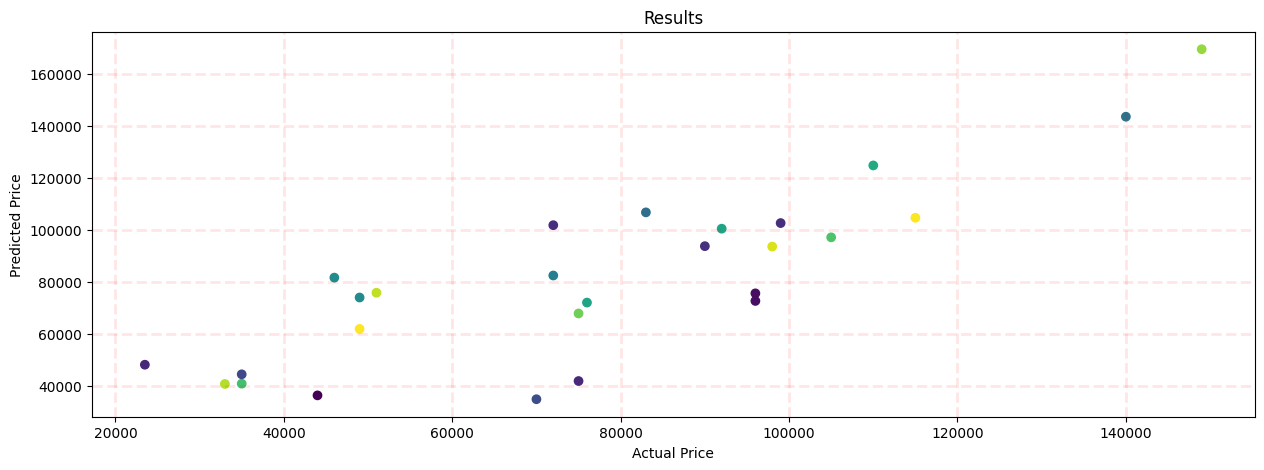

In [ ]:
from seaborn._core.properties import LineStyle
plt.figure(figsize=(15,5))
colors = np.random.rand(27)
plt.scatter(y_test, y_pred, c = colors)
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)
plt.title("Results")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

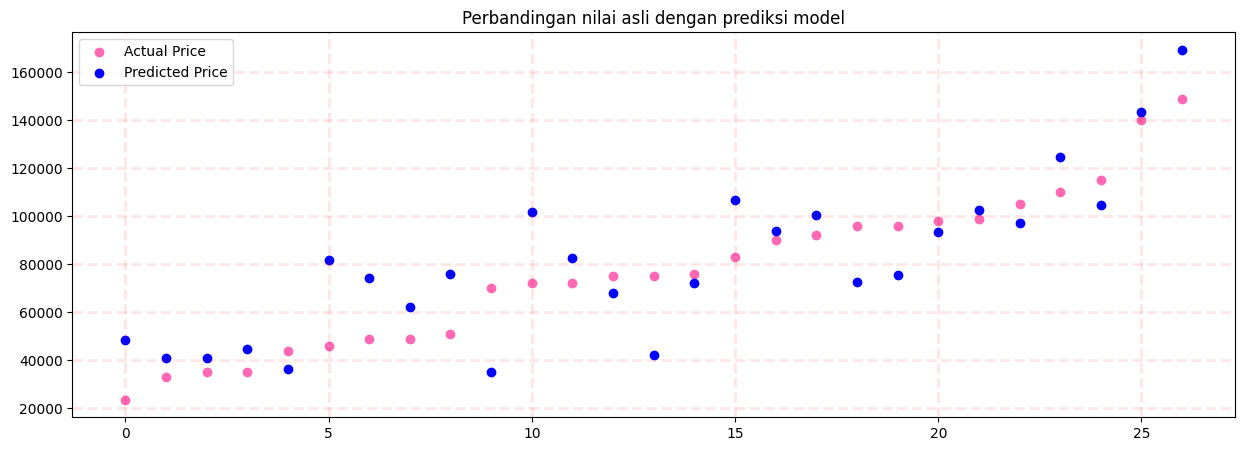

In [ ]:
plt.figure(figsize=(15,5))

#menggunakan nilai asli dari terkecil hingga tertiggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

#merubah urutan prediction price berdasarkan urutan y_sorted
prediction_sorted = y_pred[y_sorted_index]

# plot kedua price
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Actual Price', color = 'hotpink')
plt.scatter(np.arange(0,len(y_sorted)), prediction_sorted, label='Predicted Price', color = 'blue')
plt.grid(color = 'red', alpha = 0.1, linestyle = '--', linewidth = 2)
plt.title('Perbandingan nilai asli dengan prediksi model')
plt.legend()

menyimpan hasil prediksi

In [ ]:
output = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
output = output.sort_values(by = 'Actual Price')

In [ ]:
output

,Actual Price,Predicted Price
27,23500,48257.27
39,33000,40868.97
78,35000,40982.92
63,35000,44573.32
133,44000,36486.65
40,46000,81710.25
30,49000,74067.82
109,49000,62007.76
73,51000,75895.65
13,70000,35008.73


mengecek skor variance

In [ ]:
print("Trainig Model :" , reg.score(x_train, y_train))
print("Testing Model :", reg.score(x_test, y_test))

Trainig Model : 0.7710436039739629
Testing Model : 0.6559337248467757


In [ ]:
from sklearn import metrics

print('R2 Score : ', metrics.r2_score(y_test, y_pred))

R2 Score :  0.6559337475871152


In [ ]:
output.to_csv('/content/drive/My Drive/Apapun itu/pizza price predic.csv', index = False)